In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [70]:
df = pd.read_csv('london_weekends.csv')

In [71]:
df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,121.122322,Private room,False,True,2.0,False,0,0,6.0,69.0,1,5.734117,0.437094,222.882243,15.493414,470.088502,8.413765,-0.04975,51.52570
1,1,195.912416,Private room,False,True,2.0,False,1,0,10.0,96.0,1,4.788905,1.464050,235.385841,16.362588,530.133525,9.488466,-0.08475,51.54210
2,2,193.325337,Private room,False,True,3.0,False,1,0,10.0,95.0,1,4.596677,0.450306,268.913812,18.693247,548.987610,9.825922,-0.14585,51.54802
3,3,180.389943,Private room,False,True,2.0,False,1,0,9.0,87.0,1,2.054769,0.132670,472.381314,32.837067,1021.271062,18.278973,-0.10611,51.52108
4,4,405.700981,Entire home/apt,False,False,3.0,False,0,1,7.0,65.0,0,4.491277,0.354108,318.491470,22.139584,692.775411,12.399473,-0.18797,51.49399


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5379 entries, 0 to 5378
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  5379 non-null   int64  
 1   realSum                     5379 non-null   float64
 2   room_type                   5379 non-null   object 
 3   room_shared                 5379 non-null   bool   
 4   room_private                5379 non-null   bool   
 5   person_capacity             5379 non-null   float64
 6   host_is_superhost           5379 non-null   bool   
 7   multi                       5379 non-null   int64  
 8   biz                         5379 non-null   int64  
 9   cleanliness_rating          5379 non-null   float64
 10  guest_satisfaction_overall  5379 non-null   float64
 11  bedrooms                    5379 non-null   int64  
 12  dist                        5379 non-null   float64
 13  metro_dist                  5379 

In [73]:
df = df.drop(['Unnamed: 0', 'room_shared', 'room_private', 'multi', 
             'biz', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 
              'lng', 'lat', 'host_is_superhost', 'room_type'], axis=1)

In [74]:
df.head()

,realSum,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist
0,121.122322,2.0,6.0,69.0,1,5.734117,0.437094
1,195.912416,2.0,10.0,96.0,1,4.788905,1.464050
2,193.325337,3.0,10.0,95.0,1,4.596677,0.450306
3,180.389943,2.0,9.0,87.0,1,2.054769,0.132670
4,405.700981,3.0,7.0,65.0,0,4.491277,0.354108


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5379 entries, 0 to 5378
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     5379 non-null   float64
 1   person_capacity             5379 non-null   float64
 2   cleanliness_rating          5379 non-null   float64
 3   guest_satisfaction_overall  5379 non-null   float64
 4   bedrooms                    5379 non-null   int64  
 5   dist                        5379 non-null   float64
 6   metro_dist                  5379 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 294.3 KB


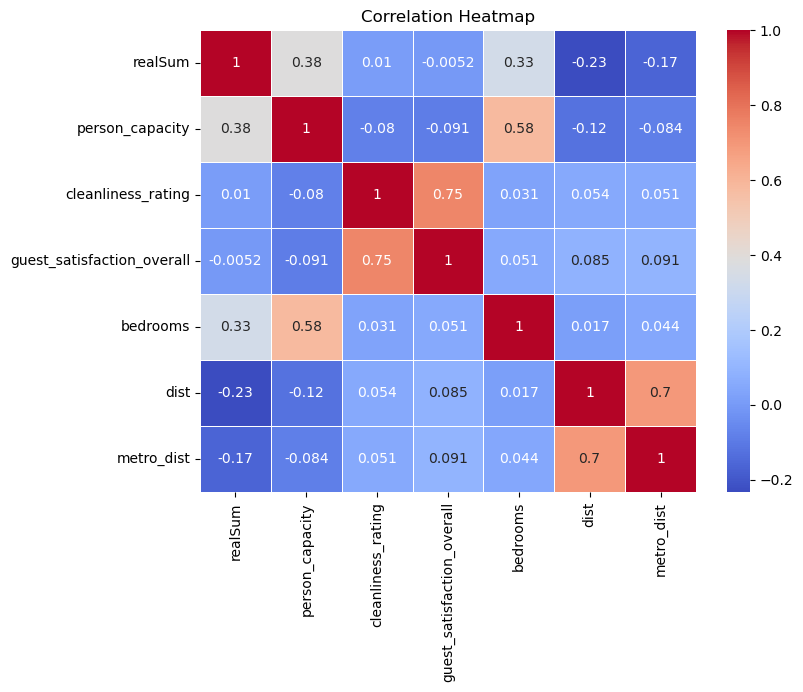

In [12]:

# Assuming 'df' is your DataFrame
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


                      Feature      F-test        p-value
0             person_capacity  931.125006  9.475162e-189
3                    bedrooms  665.609981  1.776851e-138
4                        dist  308.959941   2.720133e-67
5                  metro_dist  151.232513   2.684813e-34
1          cleanliness_rating    0.532967   4.653938e-01
2  guest_satisfaction_overall    0.145873   7.025260e-01


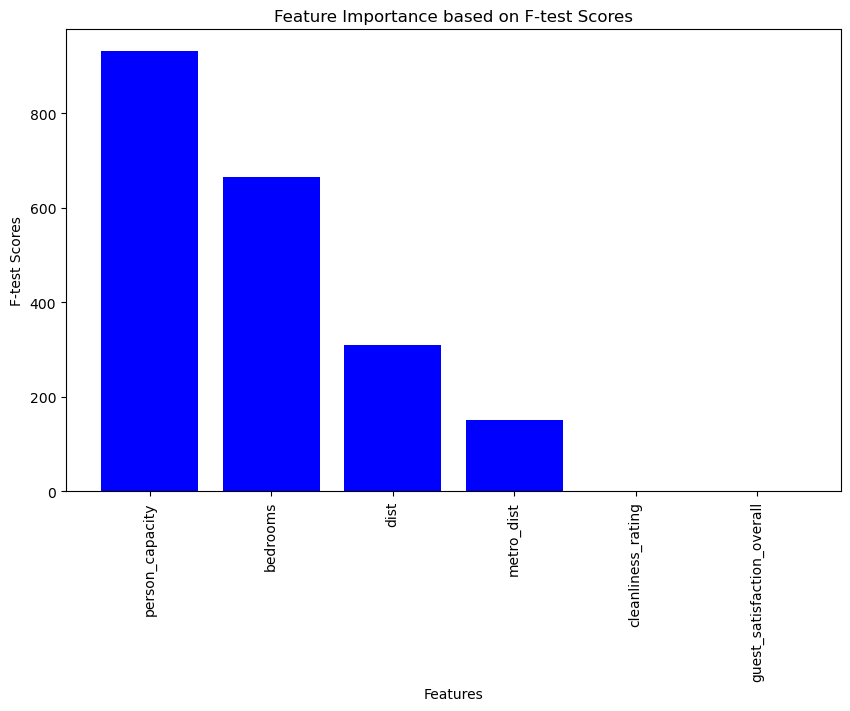

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.feature_selection import f_regression

# Assuming your data is stored in a pandas DataFrame named 'data'
# Extract the features and the target variable
X = df.drop('realSum', axis=1)
y = df['realSum']

# Compute the F-test and the p-values for the features
f_values, p_values = f_regression(X, y)

# Create a DataFrame to store feature names, F-test scores, and p-values
feature_importance = pd.DataFrame({'Feature': X.columns, 'F-test': f_values, 'p-value': p_values})

# Sort the features based on F-test scores in descending order
feature_importance.sort_values(by='F-test', ascending=False, inplace=True)

# Print the feature ranking
print(feature_importance)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['F-test'], color='b', align='center')
plt.xlabel('Features')
plt.ylabel('F-test Scores')
plt.title('Feature Importance based on F-test Scores')
plt.xticks(rotation=90)
plt.show()


Linear Regression. 

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame, and 'target_column' is the name of your target variable
# Define your feature matrix and target variable
X = df[['person_capacity','bedrooms', 'dist', 'metro_dist']] 
y = df['realSum']  # Replace 'target_column' with your actual target variable name



In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate some random data for demonstration
X, y = make_regression(n_samples=100, n_features=1, noise=0.2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train[train_index], X_train[test_index]
    y_train_kf, y_val_kf = y_train[train_index], y_train[test_index]

    # Train the model on the training fold
    model.fit(X_train_kf, y_train_kf)

    # Predict on the validation fold
    y_pred_kf = model.predict(X_val_kf)

    # Calculate the evaluation metrics for the fold
    mse_scores.append(mean_squared_error(y_val_kf, y_pred_kf))
    r2_scores.append(r2_score(y_val_kf, y_pred_kf))

# Calculate the mean of the cross-validated scores
mean_mse_score = np.mean(mse_scores)
mean_r2_score = np.mean(r2_scores)

# Print the mean cross-validated scores
print("Mean Squared Error (cross-validated):", mean_mse_score)
print("R-squared (cross-validated):", mean_r2_score)

# Calculate the evaluation metrics for the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics for the test set
print("Mean Squared Error (test set):", mse)
print("R-squared (test set):", r2)


# Train the model on the entire training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

print(y_pred)


Mean Squared Error (cross-validated): 0.03051774769756705
R-squared (cross-validated): 0.9999746983039224
Mean Squared Error (test set): 0.04168089061274856
R-squared (test set): 0.9999701457341349
[-55.50445383  61.76489382  33.95838268 -16.38467089  -9.78355716
 -12.18823629 -19.46140311 -73.67751222  34.35024511  38.92126272
  43.08865246  14.92613376 -51.01849025 -22.13731003 -48.09937456
 -20.02326373  40.77114884  10.11386892  30.86336088  15.70284117]


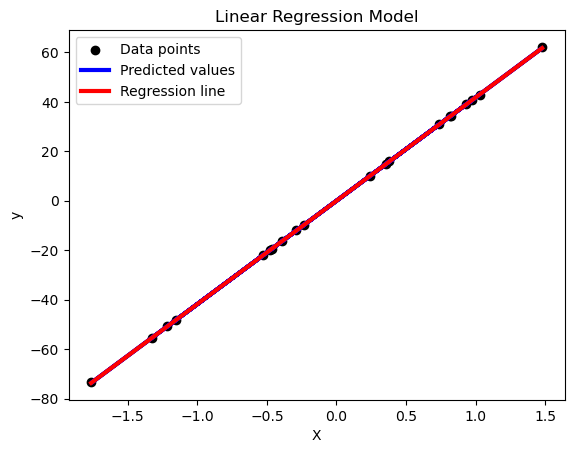

In [81]:
# Plot the data points and the linear regression model
plt.scatter(X_test, y_test, color='black', label='Data points')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted values')

# Plot the regression line
X_plot = np.linspace(np.min(X_test), np.max(X_test), 100).reshape(-1, 1)
y_plot = model.predict(X_plot)
plt.plot(X_plot, y_plot, color='red', linewidth=3, label='Regression line')

# Set the labels and title for the plot
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

Radom Forest 

Mean Squared Error: 955.6429892560693
R-squared: 0.8997971318064844


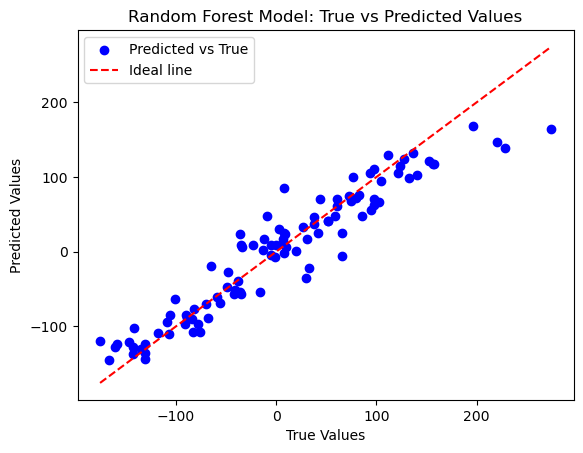

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate some random data for demonstration
X, y = make_regression(n_samples=100, n_features=4, noise=0.2, random_state=42)

# Create a random forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the predicted values
y_pred = cross_val_predict(model, X, y, cv=kf)

# Calculate the mean squared error and R-squared for the predicted values
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the mean squared error and R-squared
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the results
plt.scatter(y, y_pred, color='b', label='Predicted vs True')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='r', linestyle='--', label='Ideal line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Model: True vs Predicted Values')
plt.legend()
plt.show()


In [85]:
# Print the predicted values
print("Predicted Values:")
for i in range(len(y_pred)):
    print(f"Sample {i + 1}: {y_pred[i]}")

Predicted Values:
Sample 1: 48.15747938448717
Sample 2: -46.86729110922366
Sample 3: -135.7826806192115
Sample 4: 17.115104468500203
Sample 5: -130.666716056025
Sample 6: 24.65746867628651
Sample 7: -7.468736447114885
Sample 8: 9.409873831712058
Sample 9: -123.50135861192808
Sample 10: -21.207487271109393
Sample 11: -53.948522257905964
Sample 12: -126.88214212599406
Sample 13: -4.710984348735147
Sample 14: 17.624049754316815
Sample 15: 1.42789469058975
Sample 16: 110.70716035289381
Sample 17: -143.49414167769325
Sample 18: 98.86576384665915
Sample 19: -70.05660892562935
Sample 20: -35.552214426880326
Sample 21: 55.83484061670813
Sample 22: -107.20236166581317
Sample 23: -76.70955522868185
Sample 24: 146.5178069394996
Sample 25: 5.838868749372344
Sample 26: 70.01921367352186
Sample 27: 9.51665926433686
Sample 28: 36.638760026591115
Sample 29: 118.0385292637738
Sample 30: -85.18678761218193
Sample 31: 8.83071166471517
Sample 32: -57.09398246853643
Sample 33: -93.74471185525137
Sample 34: